# Визуальный анализ данных с помощью Python

### API библиотеки matplotlib

Официальная документация по matplotlib - https://matplotlib.org/index.html.

In [5]:
#Корректное отображение графиков прямо в jupyter'e
%matplotlib inline
#Все функции matplotlib API, в частности plot и close, находятся в модуле matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

Графики в matplotlib существуют внутри объекта рисунка Figure. Создать новый рисунок можно методом plt.figure.

Нельзя создать график, имея пустой рисунок. Сначала нужно создать один или несколько подграфиков с помощью метода add_subplot: 

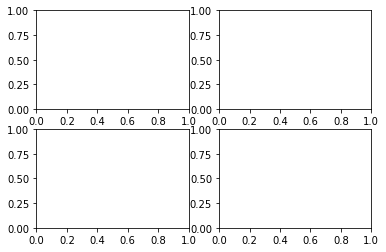

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ах2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224)  

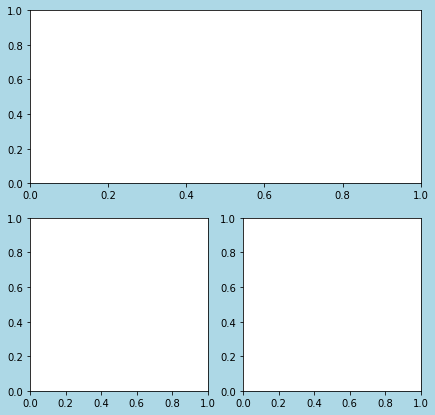

In [7]:
fig = plt.figure(figsize = (7,7), facecolor = 'lightblue')
ax1 = fig.add_subplot(224)
ах2 = fig.add_subplot(211) 
ax3 = fig.add_subplot(223)   

In [8]:
from numpy.random import randn

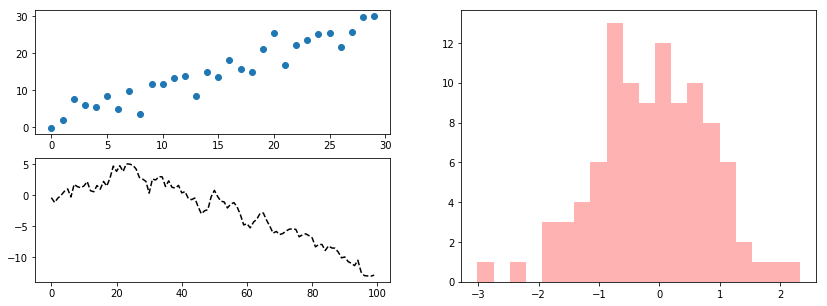

In [9]:
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(122) 
ax3 = fig.add_subplot(223)   

plt.plot(randn(100).cumsum(), 'k--') # нарисовался он в 3 так там стоял указатель
# Метод fig.add_subplot возвращает объект AxesSubplot, что позволяет рисовать в любом подrрафике, вызывая методы этого объекта:
_ = ax2.hist(randn(100), bins=20, color='r', alpha=0.3)
ax1.scatter(np.arange(30), np.arange(30) + 3 * randn(30)) 

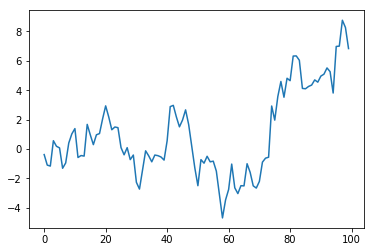

In [10]:
#Отдельно данный метод тоже будет работать, так как при необходимости он автоматически создаст рисунок и подграфик
plt.plot(randn(100).cumsum())

 Поскольку создание рисунка с несколькими подграфиками, расположенными определенным образом, - типичная задача, существует вспомогательный метод plt.subplots, который создает новый рисунок и возвращает массив NumPy, содержащий созданные в нем объекты подграфиков: 

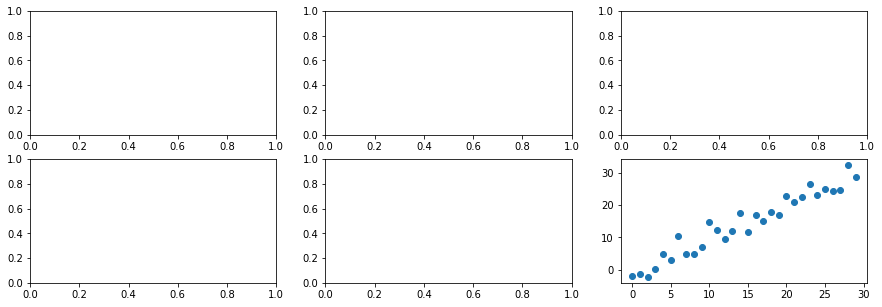

In [11]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
axes[1,2].scatter(np.arange(30), np.arange(30) + 3 * randn(30)) 

In [12]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38d05a95c0>,
      dtype=object)

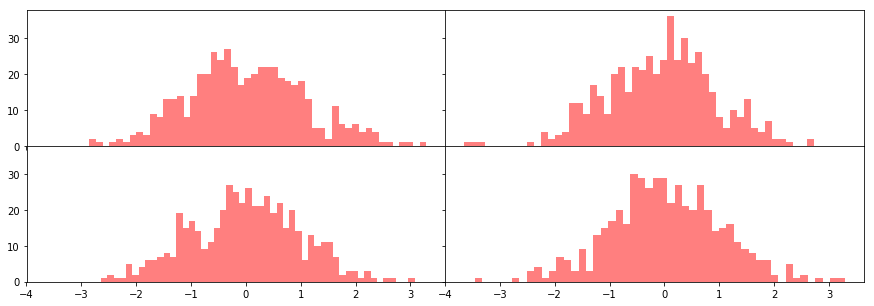

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color= 'r', alpha=0.5) 
#Достаточно популярный способ задания пустого пространства вокруг графиков         
plt.subplots_adjust(wspace=0.0, hspace=0.0) 

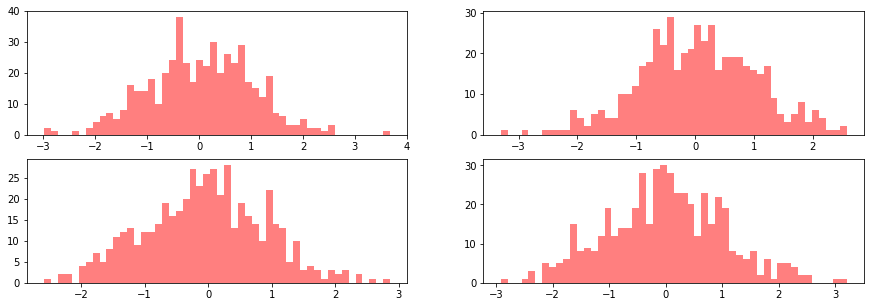

In [14]:
#Обратить внимание на общую ось 
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color= 'r', alpha=0.5) 
#Достаточно популярный способ задания пустого пространства вокруг графиков         
plt.subplots_adjust(wspace=0.2, hspace=0.2) 

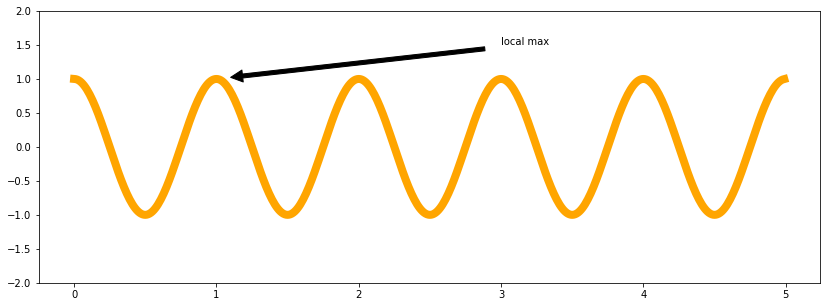

In [15]:
fig = plt.figure(figsize= (14,5))
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=8, color = 'orange')

plt.annotate('local max', xy=(1, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.savefig('figpath.png', dpi=400, bbox_inches= 'tight') 
plt.show()

#Сохранение рисунка
#plt.savefig('figpath.png', dpi=400, bbox_inches= 'tight') 

### Конфигурирование matplotlib 

В начальной конфигурации matplotlib заданы цветовые схемы и умолчания, ориентированные главным образом на подготовку рисунков к публикации. По счастью, почти все аспекты поведения по умолчанию можно сконф:гурировать с помощью обширного набора глобальных параметров, определяющих размер рисунка, промежутки между подграфикам:и, цвета, размеры шрифтов, стили сетки и т. д.

In [16]:
#Задает глобально размер рисунка
plt.rc('figure', figsize=(10, 10))
font_options = {'family' : 'monospace'} 
plt.rc('font', **font_options) 

### Упражнение

In [17]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

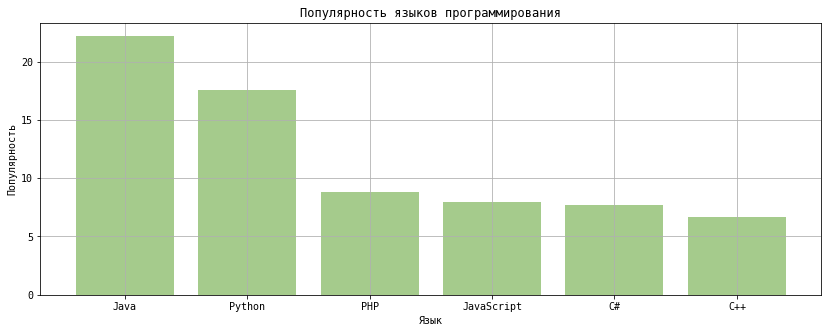

In [18]:
fig = plt.figure(figsize= (14,5))
ax = plt.subplot(111)
ax.grid()
ax.bar(x, popularity, color = (0.3,0.6,0.1,0.5))
ax.set_xlabel("Язык")
ax.set_ylabel("Популярность")
ax.set_title("Популярность языков программирования")
#ax.set_xticklabels()
plt.show()

### Визуализация с помощью Pandas

Датасет - https://www.kaggle.com/open-powerlifting/powerlifting-database.

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('files/lesson_5/openpowerlifting.csv', sep = ',')

In [21]:
df.head(200)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,NaN,120.20,NaN,54.43,NaN,108.86,283.49,1,294.25
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,NaN,NaN,NaN,NaN,NaN,108.86,108.86,1,112.99


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
MeetID            386414 non-null int64
Name              386414 non-null object
Sex               386414 non-null object
Equipment         386414 non-null object
Age               147147 non-null float64
Division          370571 non-null object
BodyweightKg      384012 non-null float64
WeightClassKg     382602 non-null object
Squat4Kg          1243 non-null float64
BestSquatKg       298071 non-null float64
Bench4Kg          1962 non-null float64
BestBenchKg       356364 non-null float64
Deadlift4Kg       2800 non-null float64
BestDeadliftKg    317847 non-null float64
TotalKg           363237 non-null float64
Place             385322 non-null object
Wilks             362194 non-null float64
dtypes: float64(10), int64(1), object(6)
memory usage: 50.1+ MB


In [23]:
cols = ['Equipment', 'Age',  'BodyweightKg', 'WeightClassKg', 'BestSquatKg','BestBenchKg','BestDeadliftKg','Place','TotalKg','Sex']
df = df[cols]
df.head()

,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Place,TotalKg,Sex
0,Wraps,47.0,59.60,60,47.63,20.41,70.31,1,138.35,F
1,Single-ply,42.0,58.51,60,142.88,95.25,163.29,1,401.42,F
2,Single-ply,42.0,58.51,60,142.88,95.25,163.29,1,401.42,F
3,Raw,42.0,58.51,60,NaN,95.25,NaN,1,95.25,F
4,Raw,18.0,63.68,67.5,NaN,31.75,90.72,1,122.47,F


Реализация функции plot в pandas основана на библиотеке matplotlib.

#### Одномерные данные

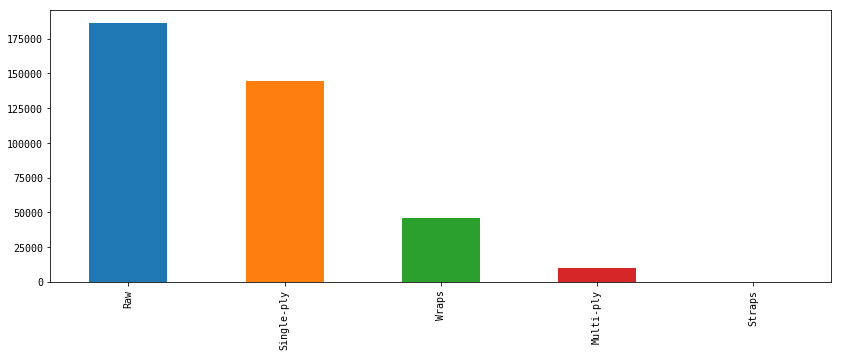

In [24]:
fig = plt.figure(figsize= (14,5))
df['Equipment'].value_counts().plot.bar()
#Bar Chart (столбчатая диаграмма) - классический интсрумент для отображения информации по категориям

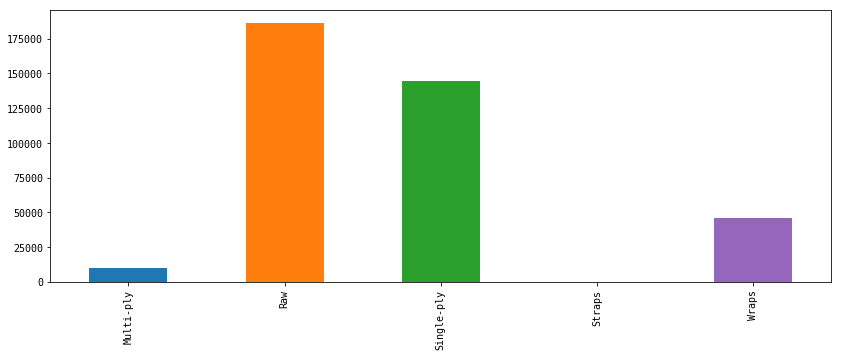

In [25]:
fig = plt.figure(figsize= (14,5))
df['Equipment'].value_counts().sort_index().plot.bar()

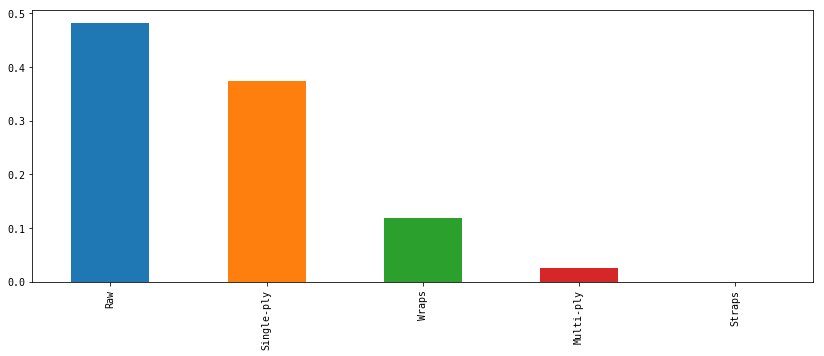

In [26]:
#Можно посмотреть относительные наблюдения
fig = plt.figure(figsize= (14,5))
(df['Equipment'].value_counts() / len(df)).plot.bar()

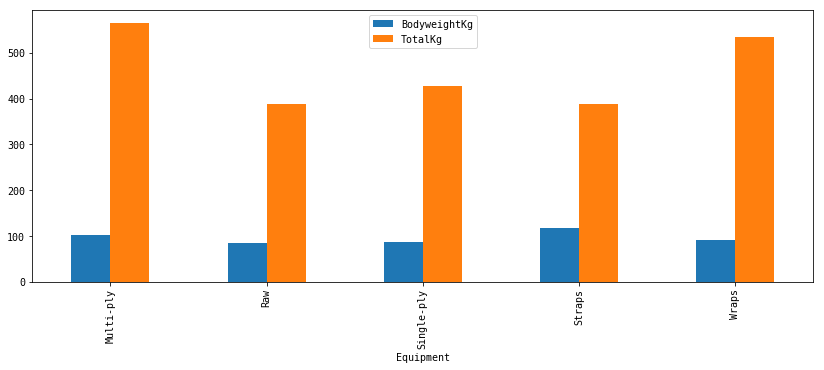

In [27]:
df.groupby(['Equipment'])[['BodyweightKg','TotalKg']].mean().plot.bar(figsize=(14,5),stacked = False)

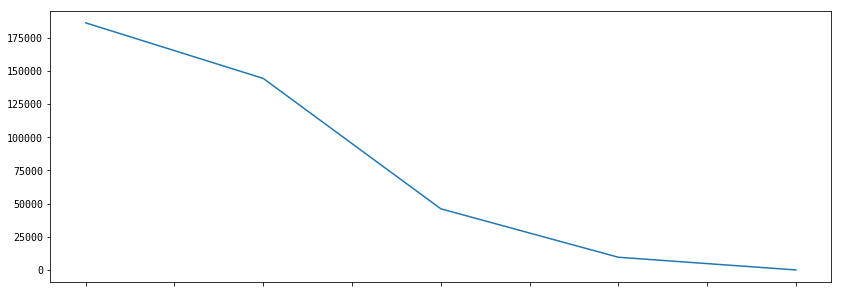

In [28]:
#Используется при большом количестве вариантов категориальной переменной (более 20 значений) 
fig = plt.figure(figsize= (14,5))
chart = df['Equipment'].value_counts().plot.line()

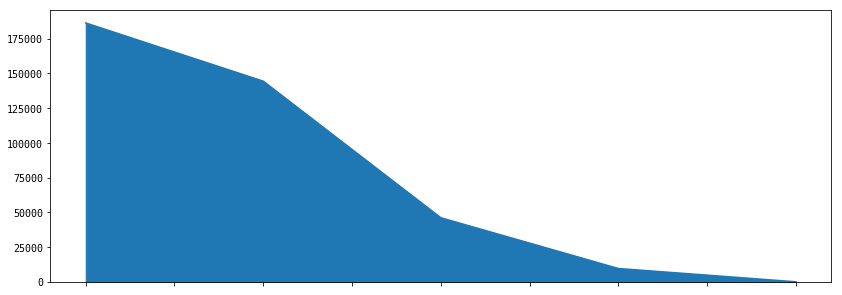

In [29]:
fig = plt.figure(figsize= (14,5))
chart = df['Equipment'].value_counts().plot.area()

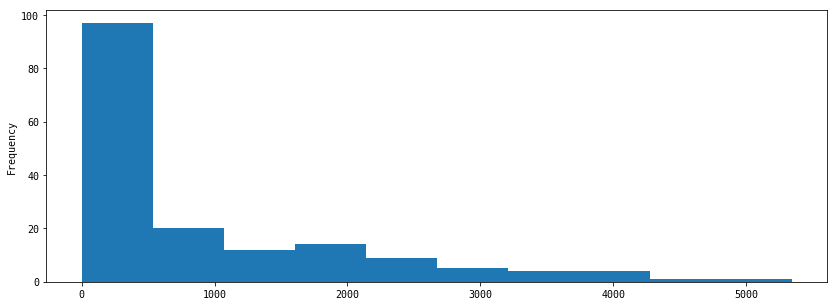

In [30]:
fig = plt.figure(figsize= (14,5))
df['Age'].value_counts().plot.hist()
#Гистограмма - классический инстрмуент для визуализации интервальных данных
#Визуально похожа на столбчатую диаграмму,гистограмма разбивает данные на равные интервалы и рисует частоты в каждом из столбцов

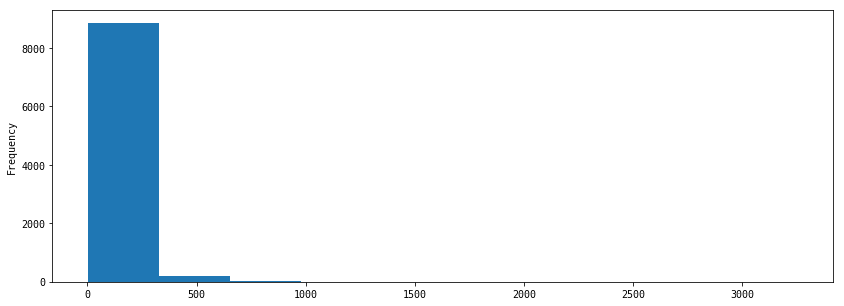

In [31]:
fig = plt.figure(figsize= (14,5))
df['BodyweightKg'].value_counts().plot.hist()
# параметр bins

#### Двумерные данные

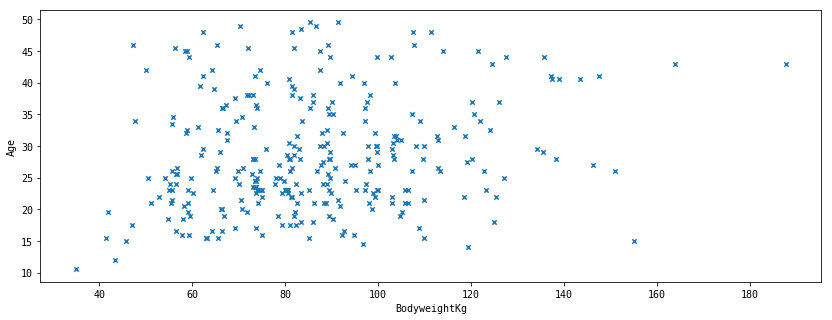

In [32]:
df[df['Age']<50].sample(300).plot.scatter(x='BodyweightKg', y='Age',figsize=(14,5), marker = 'x')
#Используется для того, чтобы показать зависимость одного показателя от другого

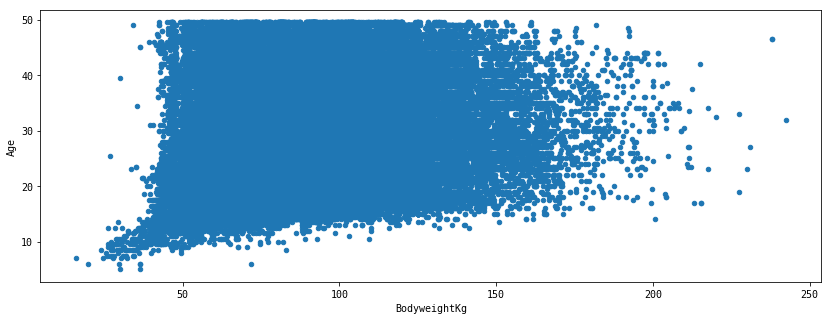

In [33]:
df[df['Age']<50].plot.scatter(x='BodyweightKg', y='Age',figsize=(14,5))
#Получается очень непонятно

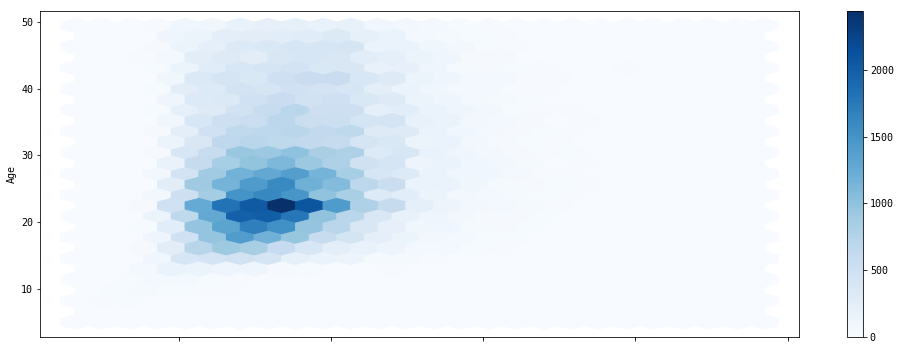

In [34]:
df[df['Age']<50].plot.hexbin(x='BodyweightKg', y='Age',figsize=(17,6), gridsize = 25,cmap ='Blues')

### Визуализация с помощью Seaborn

Seaborn также реализован на matplotlib. Outofbox решение для построения визуализаций.

In [35]:
import seaborn as sns

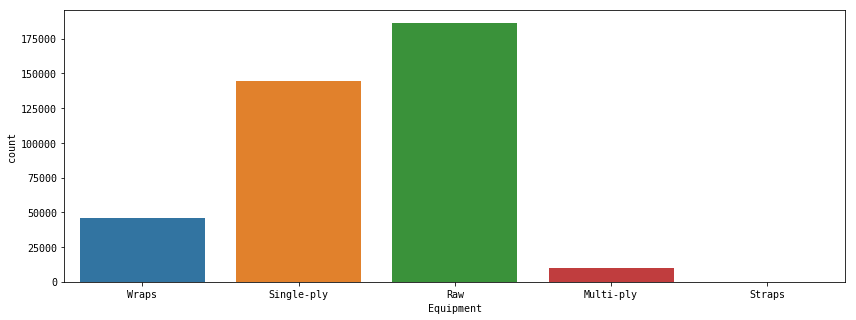

In [36]:
fig = plt.figure(figsize= (14,5))
sns.countplot(df['Equipment'])
#pandas bar = seaborn countplot
#Делается намного проще, нет нужды в агрегации с помощью value_counts

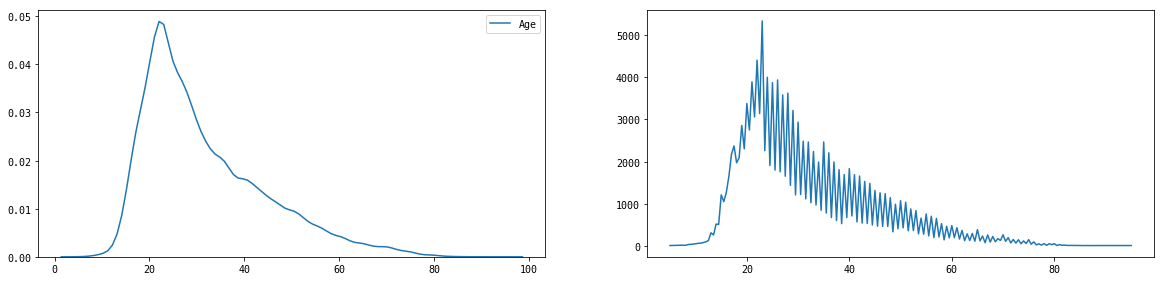

In [37]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age.dropna())
#В статистике - оценка плотности ядра - один из вариантов сглаживания
ax2 = fig.add_subplot(222) 
df['Age'].value_counts().sort_index().plot.line()

/home/evgenii/.local/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


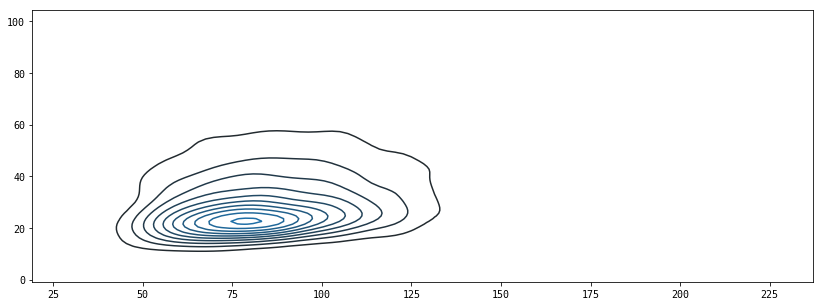

In [38]:
fig = plt.figure(figsize= (14,5))
sns.kdeplot(df.loc[:, ['BodyweightKg','Age']].dropna().sample(5000))

/home/evgenii/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


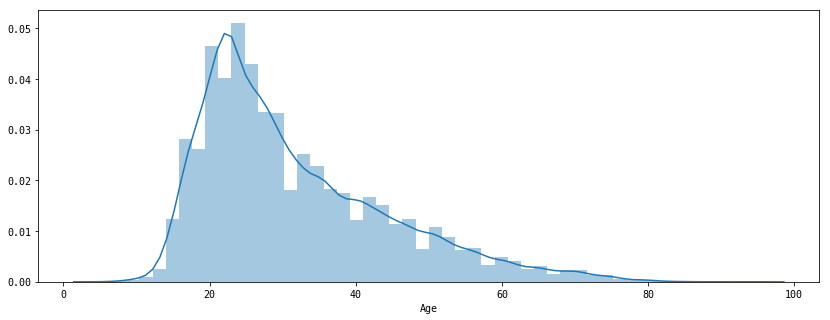

In [39]:
#Аналог гистограммы
fig = plt.figure(figsize= (14,5))
sns.distplot(df['Age'].dropna(),kde = True)

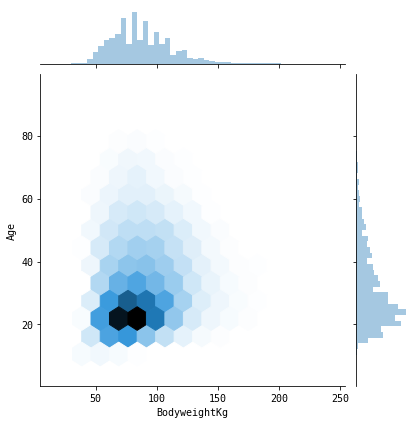

In [40]:
#Аналог scatterplot
sns.jointplot(x='BodyweightKg', y='Age', data=df, kind = 'hex', gridsize=15)

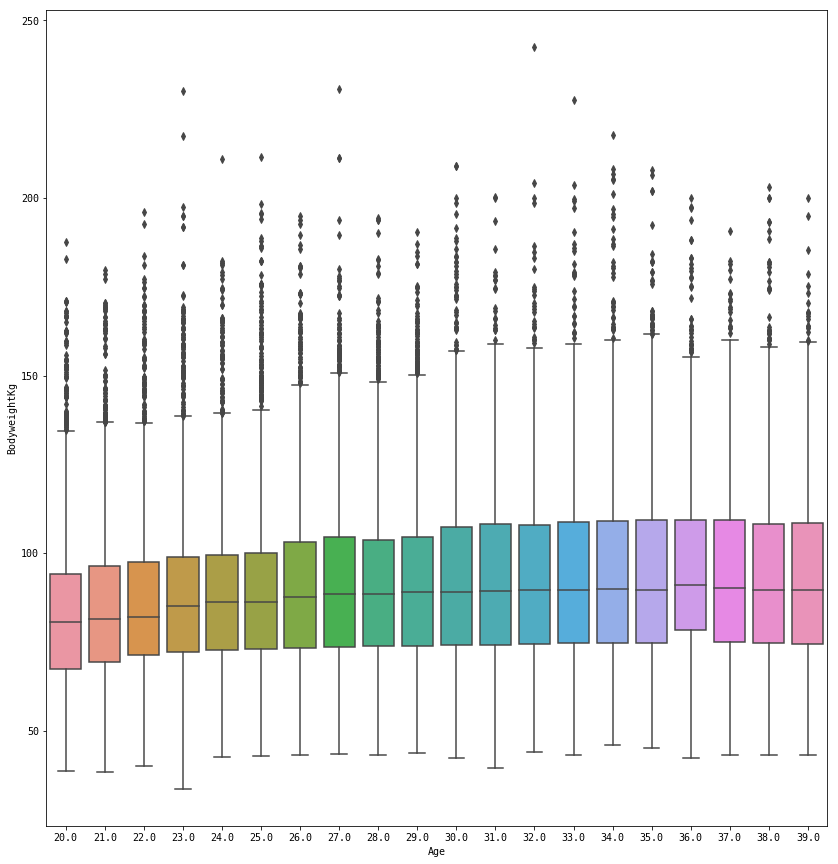

In [41]:
fig = plt.figure(figsize= (14,15))
sns.boxplot(x="Age", y="BodyweightKg", data=df[df.Age.isin(np.arange(20,40,1))], orient="v")

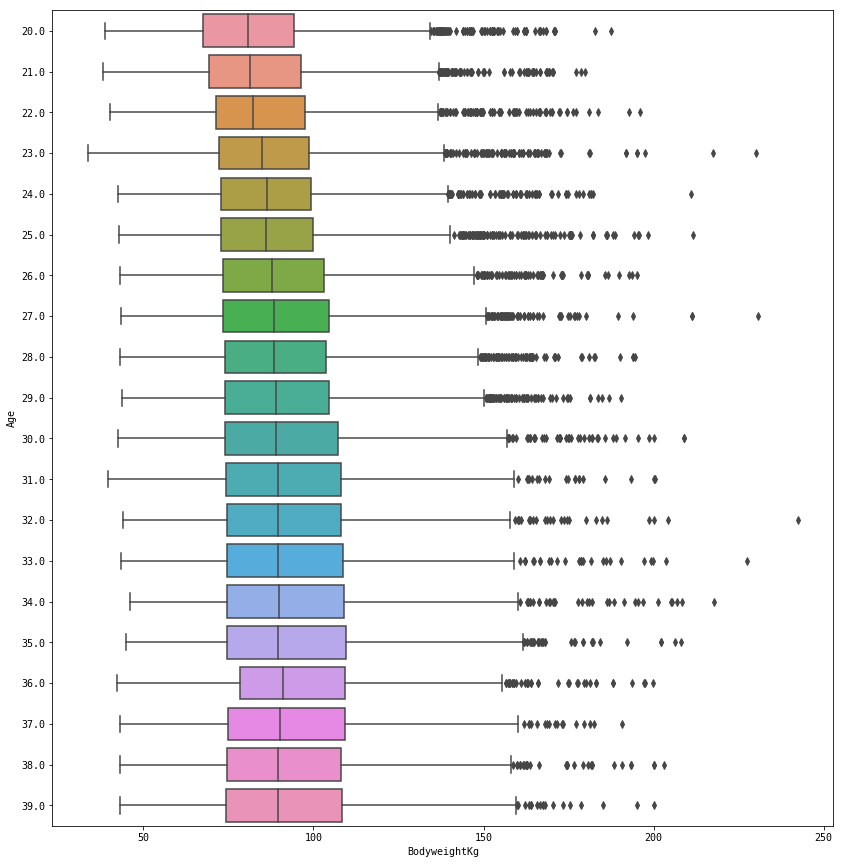

In [42]:
fig = plt.figure(figsize= (14,15))
sns.boxplot(y="Age", x="BodyweightKg", data=df[df.Age.isin(np.arange(20,40,1))], orient="h")

Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов), и они могут определяться несколькими способами. Наиболее распространённые значения, определяющие длину «усов»:

- Минимальное и максимальное наблюдаемые значения данных по выборке (в этом случае выбросы отсутствуют);
- Разность первого квартиля и полутора межквартильных расстояний; сумма третьего квартиля и полутора межквартильных расстояний.

<img width = '500px' src="images/lesson_5/d0ff538d59154901b18a98469de07fde.png">

Данные, выходящие за границы усов (выбросы), отображаются на графике в виде точек, маленьких кружков или звёздочек. Иногда на графике отмечают среднее арифметическое и его доверительный интервал («зарубка» на ящике). Иногда зарубками обозначают доверительный интервал для медианы.

В связи с тем, что не существует единого общего согласия относительно того, как конкретно строить «ящик с усами», при виде такого графика необходимо искать информацию в сопроводительном тексте относительно того, по каким параметрам ящик с усами строился.

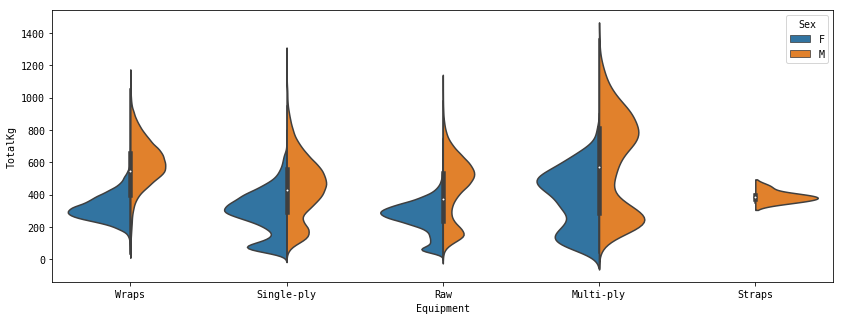

In [43]:
fig = plt.figure(figsize= (14,5))
sns.violinplot(y="TotalKg", x="Equipment",hue = 'Sex', split = True,data=df)

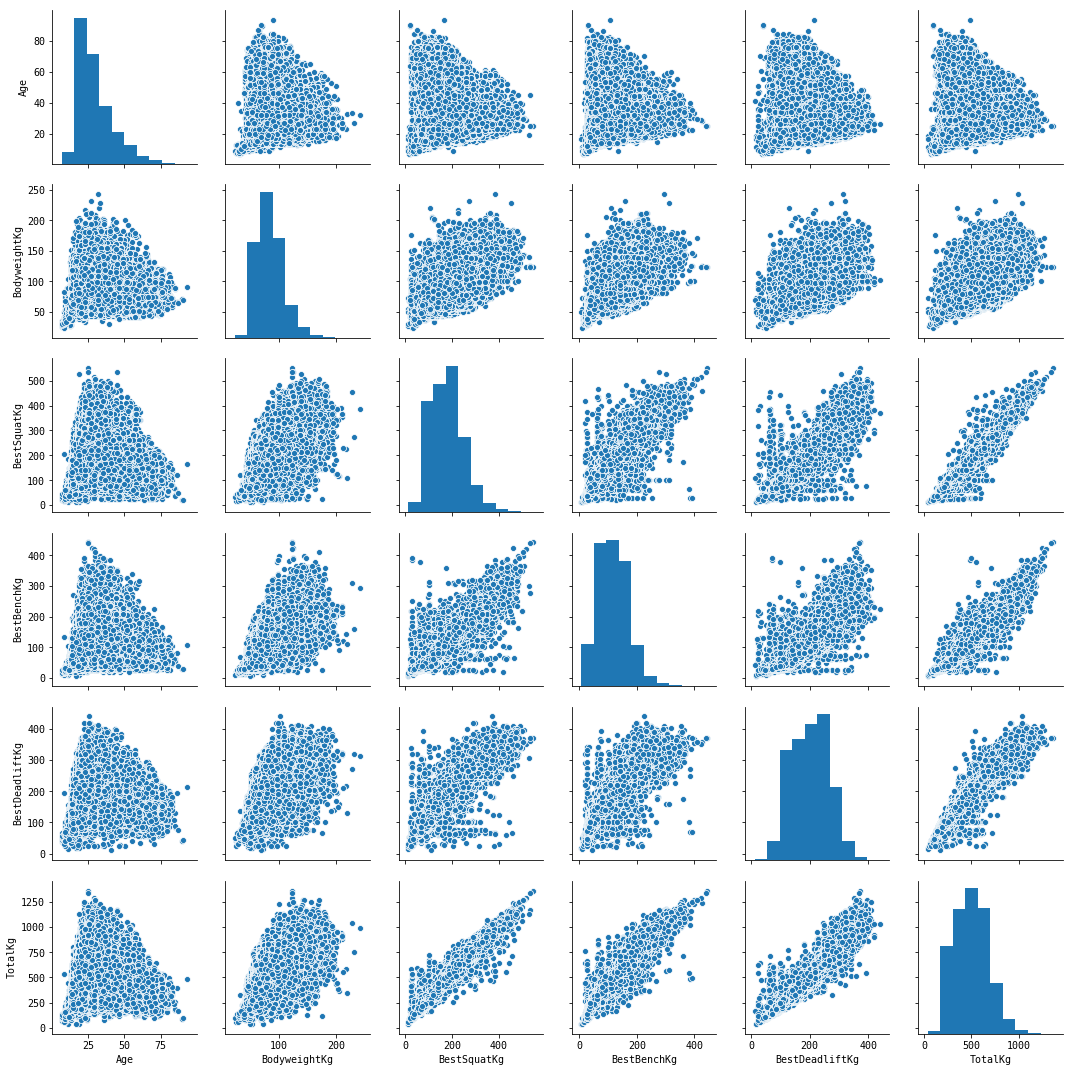

In [44]:
cols = ['Age', 'BodyweightKg',  'BestSquatKg',
       'BestBenchKg', 'BestDeadliftKg','TotalKg']
sns_plot = sns.pairplot(df[cols].dropna())

In [45]:
#Корреляция признаков
df[cols].dropna().corr()

,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg
Age,1.000000,0.105304,-0.033262,0.034416,-0.037814,-0.016395
BodyweightKg,0.105304,1.000000,0.653468,0.663675,0.639829,0.674406
BestSquatKg,-0.033262,0.653468,1.000000,0.911109,0.907187,0.976384
BestBenchKg,0.034416,0.663675,0.911109,1.000000,0.877505,0.956819
BestDeadliftKg,-0.037814,0.639829,0.907187,0.877505,1.000000,0.962902
TotalKg,-0.016395,0.674406,0.976384,0.956819,0.962902,1.000000


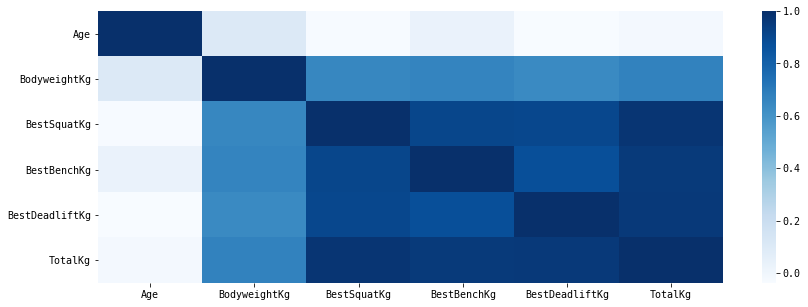

In [46]:
#Тепловая карта
fig = plt.figure(figsize= (14,5))
sns.heatmap(df[cols].dropna().corr(), cmap = 'Blues')

### Упражнение

In [47]:
partizan = pd.read_excel('files/lesson_5/partizan.xlsx')
partizan.tail()

,chain_name,lon,lat,orders
30,Zvjezda,37.718238,55.794452,4
31,Amazonija,37.748619,55.791744,5
32,Spasibo,37.728523,55.818736,0
33,Gurman_msk,37.734201,55.783089,0
34,Super_Papas,37.751179,55.780795,0


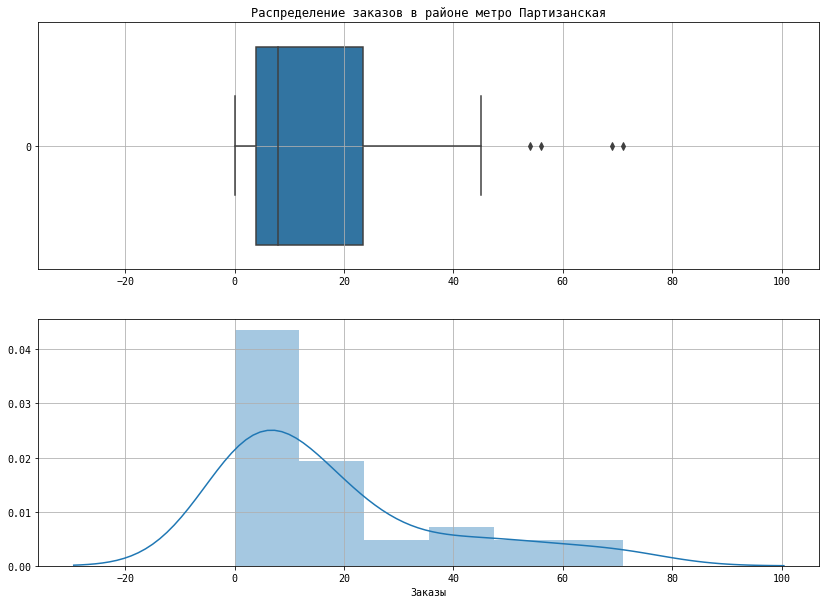

In [48]:
#Аналог гистограммы
fig = plt.figure(figsize= (14,10))
ax1 = fig.add_subplot(211)
ax1.set_title("Распределение заказов в районе метро Партизанская")
sns.boxplot(data=partizan['orders'], orient="h")
ax1.grid()
ax2 = fig.add_subplot(212, sharex = ax1)
sns.distplot(partizan['orders'].dropna(),kde = True)
ax2.set_xlabel("Заказы")
ax2.grid()




### Использование библиотеки folium

In [49]:
import folium
from folium import plugins

In [50]:
lats = list(partizan.lat)
longs = list(partizan.lon)
places=[[x[0],x[1]] for x in zip(lats,longs)]

m = folium.Map(places[0], tiles = 'OpenStreetMap', zoom_start=13)


plugins.HeatMap(places,radius =20,overlay=False, max_val= 50).add_to(m)
#plugins.MarkerCluster(places).add_to(m)
for point in places:
    folium.CircleMarker(location= point ,fill=True,
      fill_color='black').add_to(m)
m

**Задача**: на карте указаны места расположения ресторанов. Определить оптимальные точки сбора курьеров в данном районе (для расчета пути использовать евклидово расстояние).

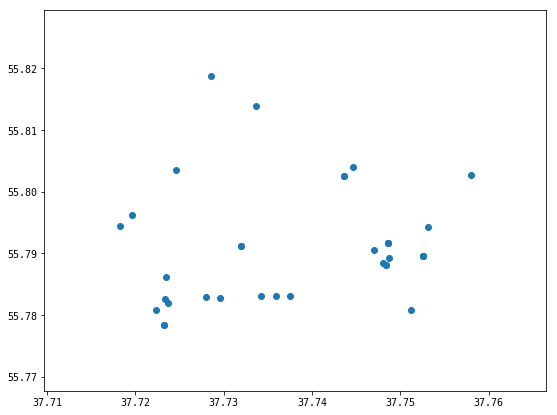

In [51]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(x = list(partizan['lon']), y  = list(partizan['lat']))

Алгоритм k-means:

- Выбрать количество кластеров , которое нам кажется оптимальным для наших данных.
- Высыпать случайным образом в пространство наших данных  точек (центроидов).
- Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.
- Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
- Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).

Силуэт:

$ s  = \frac{b - a} {max(a,b)}$  , где a - среднее расстояние от объекта до того же кластера, b - среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект).

In [52]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5).fit([[x[1],x[0]] for x in places])
labels = km.labels_
silhouette_avg = silhouette_score(places, labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5732291906333927


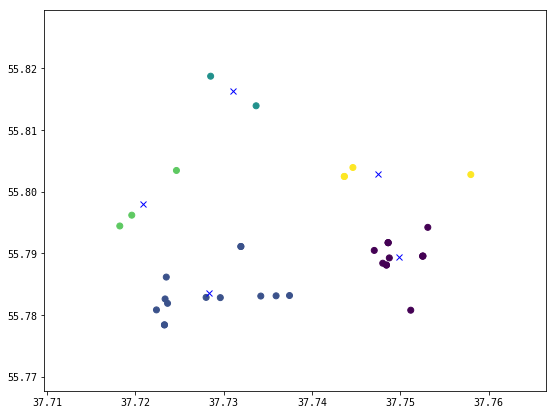

In [53]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(x = list(partizan['lon']), y  = list(partizan['lat']),c = labels)
ax.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1], 'bx' )

In [54]:
m = folium.Map(places[0], tiles = 'OpenStreetMap', zoom_start=13)


#plugins.HeatMap(places,radius =20,overlay=False, max_val= 50).add_to(m)
#plugins.MarkerCluster(places).add_to(m)

for i in [[x[1],x[0]] for x in km.cluster_centers_]:
    folium.CircleMarker(i,radius = 20,fill=True,
      fill_color='black').add_to(m)
    
m    

In [56]:
dir(folium)

['Circle',
 'CircleMarker',
 'ClickForMarker',
 'ColorLine',
 'ColorMap',
 'CssLink',
 'CustomIcon',
 'Div',
 'DivIcon',
 'Element',
 'FeatureGroup',
 'Figure',
 'FitBounds',
 'GeoJson',
 'GeoJsonTooltip',
 'Html',
 'IFrame',
 'Icon',
 'JavascriptLink',
 'LatLngPopup',
 'LayerControl',
 'LinearColormap',
 'Link',
 'MacroElement',
 'Map',
 'Marker',
 'PolyLine',
 'Polygon',
 'Popup',
 'Rectangle',
 'RegularPolygonMarker',
 'StepColormap',
 'TileLayer',
 'Tooltip',
 'TopoJson',
 'Vega',
 'VegaLite',
 'WmsTileLayer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'absolute_import',
 'branca',
 'division',
 'features',
 'folium',
 'map',
 'plugins',
 'print_function',
 'raster_layers',
 'utilities',
 'vector_layers']